# COGS 108 - Final Project 

# Overview

In this project I attempt to see if inspector ratings show some bias towards establishments in the same area as the first rating held there. I attempt to find which areas received significantly lower scores than normal and see if that area then receives a lower rating overall. I found that many areas did seem to have a lower rating as compared to the rest of the data. 

# Name & PID

- Name: Aaron Chan
- PID: A14477949

# Research Question

Do inspector ratings show bias (negative sentiment) towards establishments within the same area (zip code)? 

## Background and Prior Work

Since I was not very familiar with the process of how health insepctions are conducted, I mostly did initial research about how these are done and who they are done by. I found that health insepction regulations are goverened by a state by state basis and can differ slightly based on a county by county basis. The inspections are done by local health departments and are usually done on a scheduled staggered monthly basis (3-months, 6-months, 12-months) depending on the level of risk that the specific establishment has posed in the past (Ref 2,3). Grades usually follow a point system followed by a letter grade system. Resturaunts begin at 100 points and then are deducted based on critical or non-critical violations.  

There are studies in the past specifically talking about bias that health inspectors may have when conducting their inspections. One such study talks about how the schedule that inspectors have may influence their grading throughout the day. It was found that, as the day goes on, found violations tend to lower (Ref 7). This is possibly due to the inspector not wanting to go past their work shift or due to fatigue that builds up along the day. 

Another study talked about the "outcome bias" inspectors had. When visiting an establishment in which they found multiple violations, it was found that the inspector will increase scruitny for the next establishment citing an increase of found violations. 

References (include links):
- 1) Typical checklist for health inspections https://blog.typsy.com/how-do-health-inspections-work
- 2) Brief overview of which agencies handle what aspects (FDA regulations/local health departments visiting). Explanation of how grades are given (letter/points). https://www.webstaurantstore.com/article/16/health-inspection-checklist.html
- 3) The type of inspections listed here (routine/violation followup/customer complaint). A good explanation of risk factor along with how the process adapts to certain risks. Brief introduction of how racism might play a role in inspections. https://recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections2.htm (good read overall). 
- 4) Explanation of the process of an inspection (dyanmic and static) and the process that inspectors go through to find risks and how they are penalized. https://recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections3.htm
- 5) Talks about possible faults in the system and how it doesn't represent the full picture of what goes on in a resturant daily. https://recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections5.htm
- 6) Research and discussion on health inspection ratings in Tenessee over 1993 to 2000. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/ 
- 7) https://hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled
- 8) https://insight.kellogg.northwestern.edu/article/food-safety-inspectors-schedule

# Hypothesis


Inspectors that visit a restaurant nearby a restaurant they previously inspected will show bias in score towards the first restaurant inspected in that area. 

# Dataset(s)

I will be using the given datasets as provided by the class. A very quick look at each of the datasets provided and the attributes that they have lead me to think that I will not be using yelp or zipcodes datasets provided. The main factors that I want to look at is location, zipcode, time of inspection, and score which are all provided in the inspections dataset. 

- Dataset Name: inspections.csv
- Link to the dataset: provided by the class (./data/inspections.csv)
- Number of observations: 18466

# Setup

In [85]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 14)
plt.rcParams.update({'font.size': 16})
import seaborn as sns

from scipy import stats

# Data Cleaning

I first went through all the provided datasets so that I could find out which datasets were appropriate for me to use (results in Dataset section). 

For the dataset I chose in particular (the inspections dataset), I first cleaned the dataset to only use columns of interest. From there, I cleaned the date column from being a string to become a Python datetime object so that I could easily use it for comparison methods. I then made sure that the zipcodes and inspector id were strings as those are categorical variables and should not be confused with as continuous variables. The other columns were clean and useable to be used directly. 

In [2]:
# load files 
df_restaurants = pd.read_csv('data/restaurants.csv')
df_inspections = pd.read_csv('data/inspections.csv')
df_violations = pd.read_csv('data/violations.csv')
df_yelp = pd.read_csv('data/yelp.csv')
df_zipcodes = pd.read_csv('data/zipcodes.csv')

In [4]:
##### FIRST JUST LOOK A BIT AT EACH DATASET TO SEE WHICH ONES WILL BE USEFUL #####

In [3]:
df_restaurants.head(3)

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M


In [5]:
# transpose the head so that I can clearly see what values go in what columns 
print(df_inspections.shape)
print(df_inspections.columns)
df_inspections.head(3).T

(18466, 36)
Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')


,0,1,2
hsisid,4092013748,4092014046,4092015191
date,2012-09-21T00:00:00Z,2012-09-21T00:00:00Z,2012-09-21T00:00:00Z
name,Cafe 3000 At Wake Med,Overtime Sports Pub,TASTE OF CHINA
address1,3000 New Bern Ave,1030-149 N Rogers Ln,6209 ROCK QUARRY RD
address2,NaN,NaN,STE 126
city,raleigh,raleigh,raleigh
state,NC,NC,NC
postalcode,27610,27610,27610
phonenumber,(919) 350-8047,(919) 255-9556,(919) 773-2285
restaurantopendate,2002-12-21T00:00:00Z,2004-05-04T00:00:00Z,2008-08-04T00:00:00Z


In [6]:
df_violations.head(3)

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN


In [7]:
df_yelp.head(3)

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False


In [8]:
df_zipcodes.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


In [9]:
######## We can start to clean the data here ########

In [10]:
df_inspections.columns

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')

In [66]:
cols_interest = ['hsisid', 'date', 'x', 'y', 'zip', 'inspector_id', 'score']
df = df_inspections[cols_interest]
df.head()

,hsisid,date,x,y,zip,inspector_id,score
0,4092013748,2012-09-21T00:00:00Z,-78.587963,35.783914,27610,27.0,96.0
1,4092014046,2012-09-21T00:00:00Z,-78.549673,35.791986,27610,7.0,98.0
2,4092015191,2012-09-21T00:00:00Z,-78.547960,35.723125,27610,3.0,97.0
3,4092016122,2012-09-21T00:00:00Z,-78.815727,35.799249,27513,24.0,99.0
4,4092021513,2012-09-21T00:00:00Z,-78.296347,35.831285,27597,7.0,97.0


In [67]:
# convert date for easier comparison 
def convert_date(d):
    d = d[:10]
    return datetime.datetime.strptime(d, '%Y-%m-%d')
convert_date('2012-09-21T00:00:00Z')

datetime.datetime(2012, 9, 21, 0, 0)

In [68]:
df['date'] = df['date'].apply(convert_date)
df.head()

C:\Users\kchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hsisid,date,x,y,zip,inspector_id,score
0,4092013748,2012-09-21,-78.587963,35.783914,27610,27.0,96.0
1,4092014046,2012-09-21,-78.549673,35.791986,27610,7.0,98.0
2,4092015191,2012-09-21,-78.547960,35.723125,27610,3.0,97.0
3,4092016122,2012-09-21,-78.815727,35.799249,27513,24.0,99.0
4,4092021513,2012-09-21,-78.296347,35.831285,27597,7.0,97.0


In [69]:
df['zip'] = df['zip'].astype('str')
df['inspector_id'] = df['inspector_id'].astype('str')

C:\Users\kchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df['zip'].value_counts().index

Index(['27511', '27603', '27609', '27587', '27604', '27610', '27612', '27615',
       '27607', '27513', '27560', '27616', '27526', '27502', '27601', '27606',
       '27529', '27614', '27613', '27540', '27545', '27617', '27519', '27518',
       '27597', '27605', '27608', '27591', '27539', '27571', '27695', '27523',
       '27602', '27520', '27592', '27512', '27596', '27573', '27562', '27652',
       '27579', '27501', '27595', '27628', '27709', '27624', '27650', '28145',
       '28587', '27522', '27619'],
      dtype='object')

# Data Analysis & Results

In [15]:
##### EDA #####

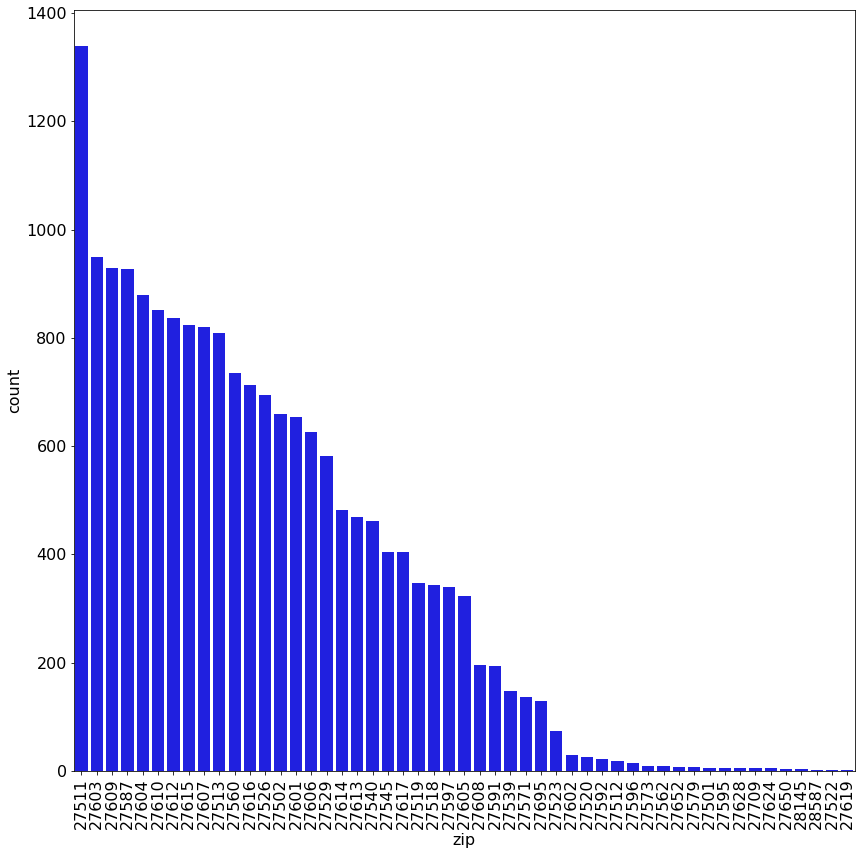

In [38]:
plt.xticks(rotation=90)
sns.countplot(df['zip'], order=df['zip'].value_counts().index, color='blue')

Looking at zip code, there is quite a significantly large number of restaurant inspections that are held in zip code 27511. We can expect this area to be something like a very crowded city with many resturants that require a frequent number of inspections due to the high volume of people going in and out. On the other end, we have areas with very very few inspections in total. This may be due to the newness of the area or its separation from the rest of the population. 

[Text(0, 0.5, 'latitude'),
 Text(0.5, 0, 'longitude'),
 Text(0.5, 1.0, 'Map of restaurant inspections by zipcode')]

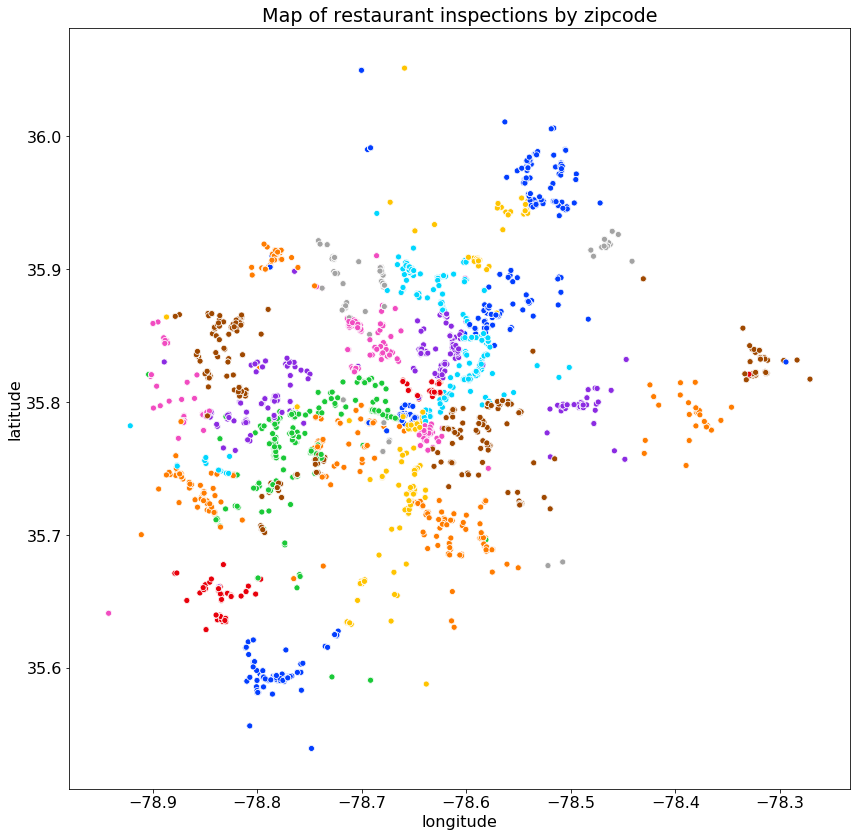

In [54]:
ax = sns.scatterplot(x=df['x'], y=df['y'], hue=df['zip'], palette='bright', legend=False)
ax.set(xlabel='longitude', ylabel='latitude', title='Map of restaurant inspections by zipcode')

This map allows us to gete a feel for how restaurants are laid out and how they are split on by zip code. What's interesting to see is that the center has a really high density of multiple zipcodes intermixing in the restaurants. The outer areas have more defined spaces for themselves. We can also see off in the far edges that there are some standalone restaurants that correlate with our zip frequencies. 

[Text(0, 0.5, 'frequency')]

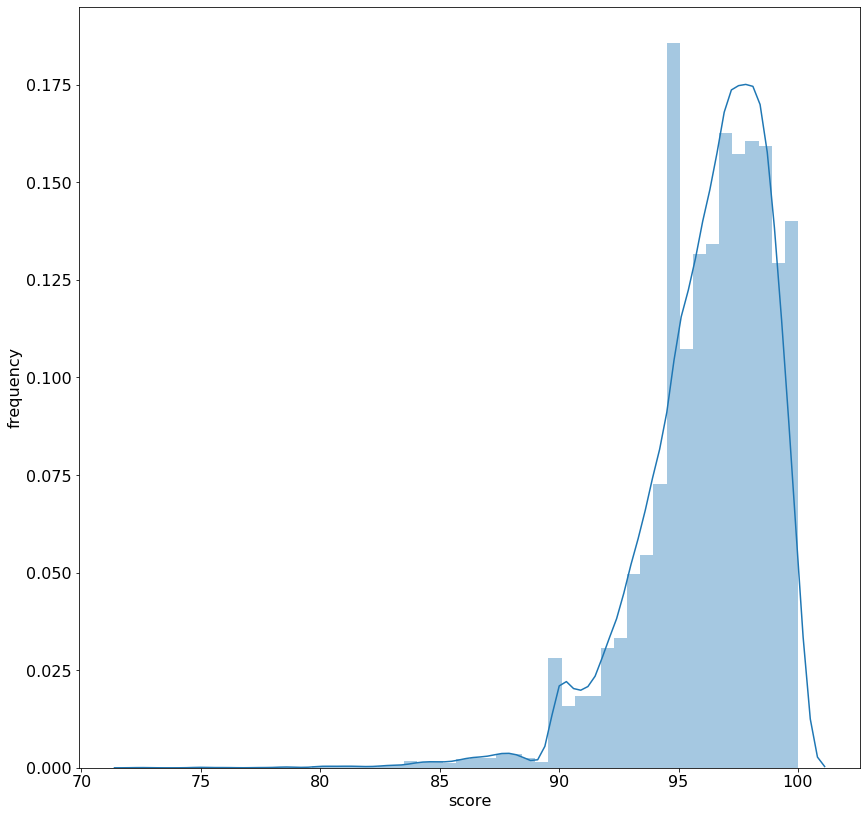

In [56]:
ax = sns.distplot(df['score'])
ax.set(ylabel='frequency')

From this, we can see a really skewed distribution of scores. Most scores are within the 95-100 range with a tail that really dips once you fall past 90. This does make sense considering 90 is the cutoff for an A grade and most restaurants would cause more trouble if given a B score. This also indicates to us that the mean may not be the best measure for center. 

In [59]:
##### Analysis ######

Let's first try to find out what qualifies as a low score that could cause bias. I will classify any score lower than the 10th percentile (of a region) to be a "low score". We will then see if there are any "low scores" for the first scores in each region. If there are, then we can proceed to see if this "low score" seemingly affected the scores for that region as a whole. 

In [76]:
q1 = df['score'].quantile(0.10)
q1

93.0

We will use a score of 95 as our cut off for what a low score will be. 

In [77]:
df['low_score'] = df['score'] < 93
df.head()

C:\Users\kchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hsisid,date,x,y,zip,inspector_id,score,low_score
0,4092013748,2012-09-21,-78.587963,35.783914,27610,27.0,96.0,False
1,4092014046,2012-09-21,-78.549673,35.791986,27610,7.0,98.0,False
2,4092015191,2012-09-21,-78.547960,35.723125,27610,3.0,97.0,False
3,4092016122,2012-09-21,-78.815727,35.799249,27513,24.0,99.0,False
4,4092021513,2012-09-21,-78.296347,35.831285,27597,7.0,97.0,False


Now let's see which zip codes have "low scores" as their first score. 

In [81]:
low_zip = []
for z in df['zip'].unique():
    df_z = df[df['zip'] == z]
    min_date = df_z['date'].min()
    df_min_date = df[df['date'] == min_date]
    
    if df_min_date['low_score'].any():
        low_zip.append(z)
low_zip

['27616',
 '27607',
 '27604',
 '27519',
 '27613',
 '27617',
 '27560',
 '27601',
 '27523',
 '27695',
 '27602',
 '27619',
 '27709',
 '27650',
 '27501',
 '27522',
 '27579',
 '28145',
 '28587']

These are the areas in which low scores were received on the first day of a restaurant being inspected there. There are 18 zip codes in which this happened. 

We will see if the overall rating of these zip codes are lower than the ratings of the entire sample overall. 

In [93]:
for z in low_zip: 
    df_z = df[df['zip'] == z]
    df_non_z = df[df['zip'] != z]
    s, p = stats.ttest_ind(df_z['score'], df_non_z['score'])
    if p < 0.05: 
        print('For the zip code ' + z + ' the p_val given is: ' + str(p) + ' which is less than an alpha of 0.05')
    else:
        print('For the zip code ' + z + ' the p_val given is: ' + str(p) + ' which is greater than an alpha of 0.05')

For the zip code 27616 the p_val given is: 0.08493873277152417 which is greater than an alpha of 0.05
For the zip code 27607 the p_val given is: 0.0038808927895591988 which is less than an alpha of 0.05
For the zip code 27604 the p_val given is: 9.426724894692882e-17 which is less than an alpha of 0.05
For the zip code 27519 the p_val given is: 2.397616784078062e-05 which is less than an alpha of 0.05
For the zip code 27613 the p_val given is: 0.008986971869658382 which is less than an alpha of 0.05
For the zip code 27617 the p_val given is: 6.252619062505962e-14 which is less than an alpha of 0.05
For the zip code 27560 the p_val given is: 6.787596919786789e-10 which is less than an alpha of 0.05
For the zip code 27601 the p_val given is: 0.03788060941524683 which is less than an alpha of 0.05
For the zip code 27523 the p_val given is: 0.3028218364660784 which is greater than an alpha of 0.05
For the zip code 27695 the p_val given is: 2.0242554712845932e-13 which is less than an alpha

We can see that for 9 zip codes (27607 27604 27519 27613 27617 27560 27601 27695 27602) there is enough significance to reject the null of the first review not mattering. 

# Ethics & Privacy

A large concern might be what establishments might choose to move around based on the ratings that it's peers have. Some restaurants might choose to move away from areas with generally low health ratings. 

There is also the possibility of establishments with certain ethnic groups of cuisine. Since similar cultures tend to group together, it is possible that many restaurants of similar culture are grouped together which might affect how inspectors give their health ratings. This could pose a much deeper problem with health inspectors themselves falling to racial bias without even realizing it. 

There is also the possibility of establishments in certain lower income areas. People with similar socioeconomic status tend to live around each other which will also affect the type of establishments that are built in their communities. Fast food places for example might show more prevalence around lower income areas while dine-in restaurants are closer to higher income areas. 

# Conclusion & Discussion

The data I used was the inspection data that was provided by the class and I attempted to see if first ratings in a certain area would sway the health ratings in following inspections. I found that in many regions, the first review did seem to have an impact on the overall rating of that area. 

I hit a road block when I saw that the inspection dates were not as granular as I would have wanted. I could only go down to the earliest day an inspection had happened, so if there were multiple inspections on a single day, I wouldn't be able to determine which inspection was first. Through this work I hope to see health inspectors be able to address biases that they may have even if they are not fully aware of it. 